<a href="https://colab.research.google.com/github/1101148889/MyrepositoryPy/blob/main/Assignment11Py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/Colab Notebooks


/content/drive/MyDrive/Colab Notebooks


In [24]:
ls

dataset@  dataset55classes/  dataset5class/


In [61]:
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [62]:
print("[INFO] loading images...")
imagePaths = paths.list_images("dataset5class")
data = []
labels = []

[INFO] loading images...


In [63]:
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
  #preprocessing
	image = np.array(image.resize((256, 256))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [64]:
print(labels)

['GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07',

In [65]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [66]:
print(labels)

[[0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]


In [67]:
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(347, 256, 256, 3)
(116, 256, 256, 3)


In [68]:
from keras.layers import Convolution2D, MaxPool2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(8, (3,3), activation='relu', input_shape=(256,256,3)))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(16, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 254, 254, 8)       224       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 127, 127, 8)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 125, 125, 16)      1168      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 62, 62, 16)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 61504)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               6150500   
_________________________________________________________________
dense_7 (Dense)              (None, 5)                

In [69]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [70]:
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

Epoch 1/25
11/11 [==============================] - 11s 963ms/step - loss: 3.5687 - accuracy: 0.2190 - val_loss: 1.6044 - val_accuracy: 0.3190
Epoch 2/25
11/11 [==============================] - 10s 932ms/step - loss: 1.5269 - accuracy: 0.3256 - val_loss: 1.4690 - val_accuracy: 0.3448
Epoch 3/25
11/11 [==============================] - 10s 935ms/step - loss: 1.3804 - accuracy: 0.3718 - val_loss: 1.3278 - val_accuracy: 0.4052
Epoch 4/25
11/11 [==============================] - 10s 935ms/step - loss: 1.1484 - accuracy: 0.5447 - val_loss: 1.1044 - val_accuracy: 0.5948
Epoch 5/25
11/11 [==============================] - 10s 932ms/step - loss: 0.9319 - accuracy: 0.6830 - val_loss: 1.0009 - val_accuracy: 0.6034
Epoch 6/25
11/11 [==============================] - 10s 940ms/step - loss: 0.6849 - accuracy: 0.7550 - val_loss: 0.8000 - val_accuracy: 0.6810
Epoch 7/25
11/11 [==============================] - 10s 945ms/step - loss: 0.3841 - accuracy: 0.9107 - val_loss: 0.7740 - val_accuracy: 0.6638

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


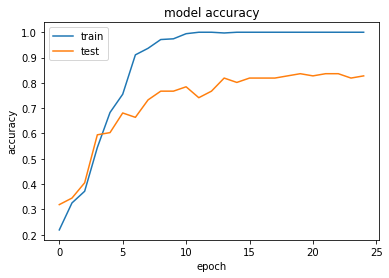

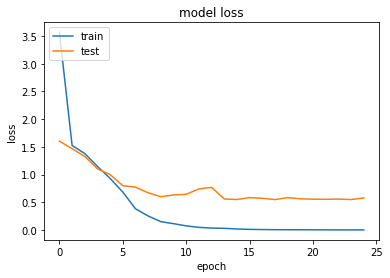

In [71]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [72]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_06       0.79      0.66      0.72        29
      GMB_07       0.84      0.91      0.88        35
      GMB_08       0.83      0.89      0.86        28
      GMB_09       0.75      0.82      0.78        11
      GMB_10       0.92      0.85      0.88        13

    accuracy                           0.83       116
   macro avg       0.83      0.83      0.82       116
weighted avg       0.83      0.83      0.82       116



In [73]:
model1.save('nnmodel_scene')


INFO:tensorflow:Assets written to: nnmodel_scene/assets


INFO:tensorflow:Assets written to: nnmodel_scene/assets


In [74]:
import cv2
import matplotlib.pyplot as plt
image1='/content/drive/MyDrive/Colab Notebooks/dataset5class/GMB_06/IMG_20200814_133710_HDR.jpg'

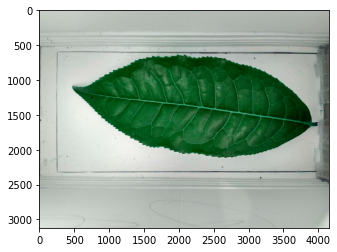

In [75]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [76]:
image_testing = Image.open('/content/drive/MyDrive/Colab Notebooks/dataset5class/GMB_06/IMG_20200814_133710_HDR.jpg')
image_testing = np.array(image_testing.resize((256, 256))) / 255.0
image_testing.shape


(256, 256, 3)

In [77]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 256, 256, 3)


In [78]:
output = model1.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[2.0656757e-05 9.9586761e-01 3.9865524e-03 1.7190700e-09 1.2525666e-04]]
['GMB_07']
